<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20aug%20densenet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/Aug_PCB'

In [3]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(5040, 300, 300, 3)
(5040,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [6]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(3376, 300, 300, 3)
(3376,)
(1664, 300, 300, 3)
(1664,)
4
float32
4
float32
4
float32


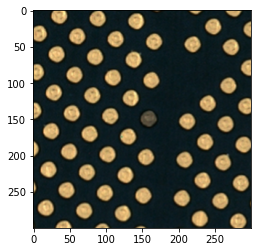

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [9]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376,)


In [10]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.20953335
0.20788454
3.8024313 3.8024313
-1.0079314 -1.0079314


In [11]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.


[1. 0.]


In [12]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [13]:
from keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras import backend as K

# create the base pre-trained model
input_tensor = Input(shape=(300, 300, 3))
base_model = DenseNet201(input_tensor=input_tensor,weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False

model.summary()














74842112/74836368 [==============================] - 6s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
______________

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [15]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [16]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.33), batch_size=20,epochs=10, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2261 samples, validate on 1115 samples
Epoch 1/10
2261/2261 [==============================] - 3367s 1s/step - loss: 0.2479 - acc: 0.8921 - val_loss: 1.7358 - val_acc: 0.5623
Epoch 2/10
2261/2261 [==============================] - 3376s 1s/step - loss: 0.0967 - acc: 0.9673 - val_loss: 2.0472 - val_acc: 0.5094
Epoch 3/10
2261/2261 [==============================] - 3349s 1s/step - loss: 0.0493 - acc: 0.9819 - val_loss: 0.3178 - val_acc: 0.8915
Epoch 4/10
2261/2261 [==============================] - 3363s 1s/step - loss: 0.0255 - acc: 0.9912 - val_loss: 0.0489 - val_acc: 0.9830
Epoch 5/10
2261/2261 [==============================] - 3370s 1s/step - loss: 0.0131 - acc: 0.9969 - val_loss: 0.0682 - val_acc: 0.9812
Epoch 6/10
2261/2261 [==============================] - 3428s 2s/step - loss: 0.0098 - acc: 0.9982 - val_loss: 1.0597 - val_acc: 0.7435
Epoch 7/10
2000/2261 [================

KeyboardInterrupt: ignored

In [17]:
model.evaluate(xtest,ytest)

1664/1664 [==============================] - 739s 444ms/step


[0.062320511671154794, 0.9801682692307693]

In [18]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.97      0.98       826
     class 1       0.97      0.99      0.98       838

    accuracy                           0.98      1664
   macro avg       0.98      0.98      0.98      1664
weighted avg       0.98      0.98      0.98      1664



In [0]:
model.evaluate(xtrain,ytrain)

In [19]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99      1694
     class 1       0.99      1.00      0.99      1682

    accuracy                           0.99      3376
   macro avg       0.99      0.99      0.99      3376
weighted avg       0.99      0.99      0.99      3376

